In [23]:
from sklearn import preprocessing
import pandas as pd
import numpy as np 

from sklearn.datasets import load_boston

boston = load_boston()
X,y = boston.data, boston.target

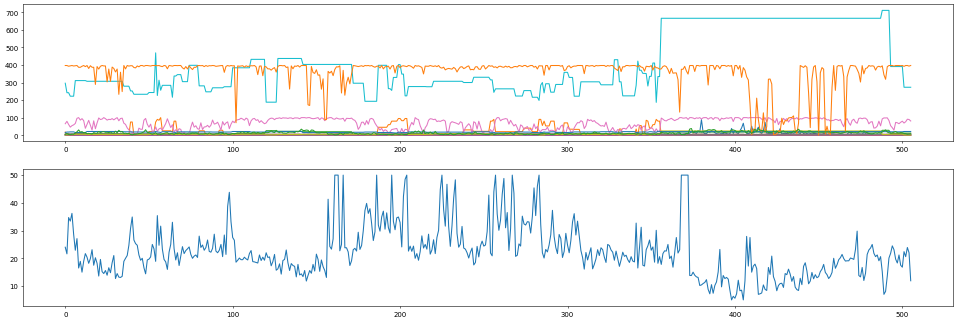

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 8), dpi=50)
plt.subplot(211)
plt.plot(X)
plt.subplot(212)
plt.plot(y)

In [25]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [26]:
z=np.array(y).reshape(-1, 1)
print(z[0:5])
print(len(z))

[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]]
506


In [27]:
x = list(range(0, 506, 1))
w=np.array(x).reshape(-1, 1)

In [28]:
print(w[0:5])

[[0]
 [1]
 [2]
 [3]
 [4]]


In [29]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [30]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [140]:
X_test = np.arange(0.0, 506, 1)[:, np.newaxis]

regr_1 = DecisionTreeRegressor(max_depth=3)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(w, y)
regr_2.fit(w, y)

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

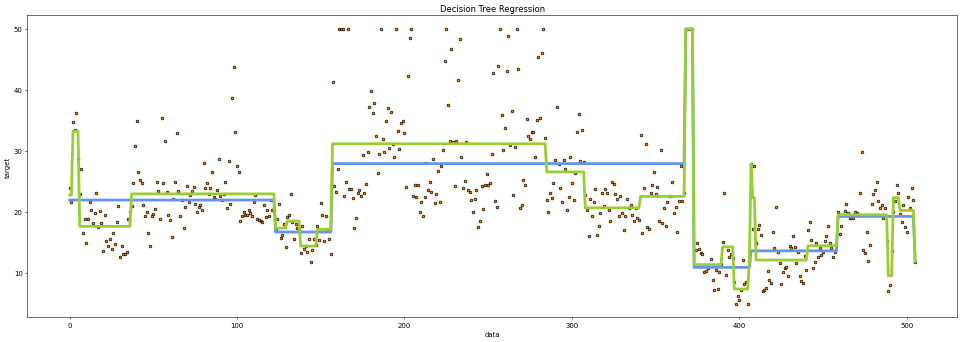

In [141]:
plt.figure(figsize=(24, 8), dpi=50)
plt.scatter(w, y, s=15, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=4)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=3", linewidth=4)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.show()

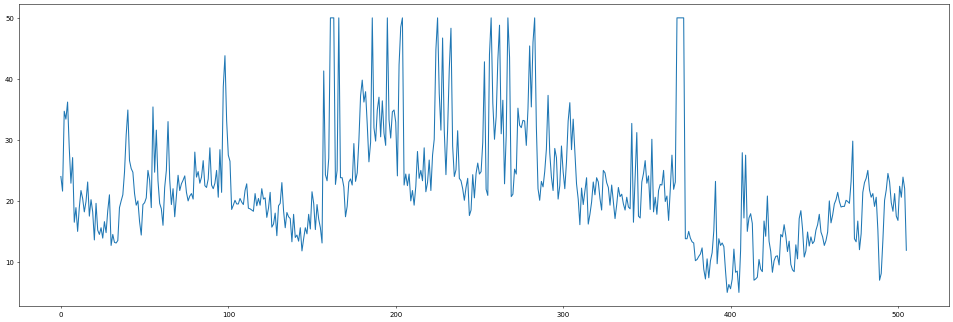

In [37]:
plt.figure(figsize=(24, 8), dpi=50)
plt.plot(y)

In [38]:
import hmmlearn
from hmmlearn.hmm import GaussianHMM

In [46]:
y2 = y.reshape(-1,1)

In [47]:
vals = np.expand_dims(y2, 1)
n_states = 2
model = GaussianHMM(n_components=n_states, n_iter=100).fit(y2)
hidden_states = model.predict(y2)

In [48]:
np.bincount(hidden_states)

array([372, 134], dtype=int64)

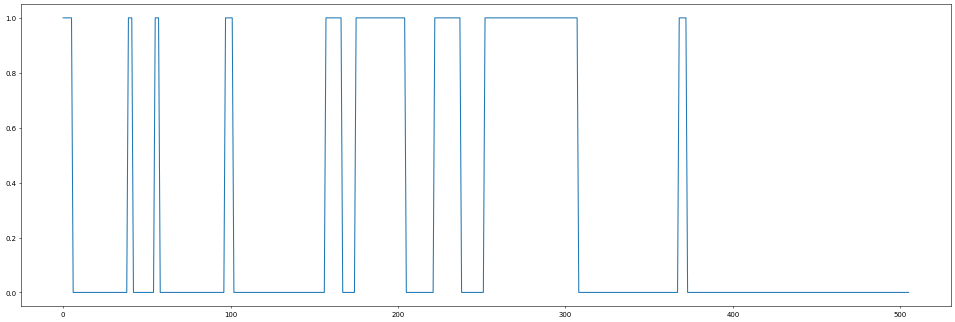

In [49]:
plt.figure(figsize=(24, 8), dpi=50)
plt.plot(hidden_states)

In [50]:
def fitHMM(vals, n_states):
    vals = np.reshape(vals,[len(vals),1])
    
    # fit Gaussian HMM to Q
    model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
     
    # classify each observation as state 0 or 1
    hidden_states = model.predict(vals)
 
    # fit HMM parameters
    mus = np.squeeze(model.means_)
    sigmas = np.squeeze(np.sqrt(model.covars_))
    transmat = np.array(model.transmat_)
    print(mus)
    print(sigmas)
    
    relabeled_states = hidden_states
    return (relabeled_states, mus, sigmas, transmat, model)

In [143]:
hidden_states, mus, sigmas, transmat, model = fitHMM(y2, 3)

[13.32061424 35.54649392 21.6393138 ]
[3.62015102 8.50851683 3.10983821]


In [144]:
def plot_states(ts_vals, states, time_vals):
    fig, ax1 = plt.subplots(figsize=(24, 8))

    color = 'tab:red'
    #ax1.set_xlabel('time')
    #ax1.set_ylabel('traffic', color=color)
    #ax1.plot(time_vals, ts_vals, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(time_vals,states,     color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()   
    plt.show()

In [145]:
print(len(y2))

506


In [98]:
x_axis = np.array(range(506))

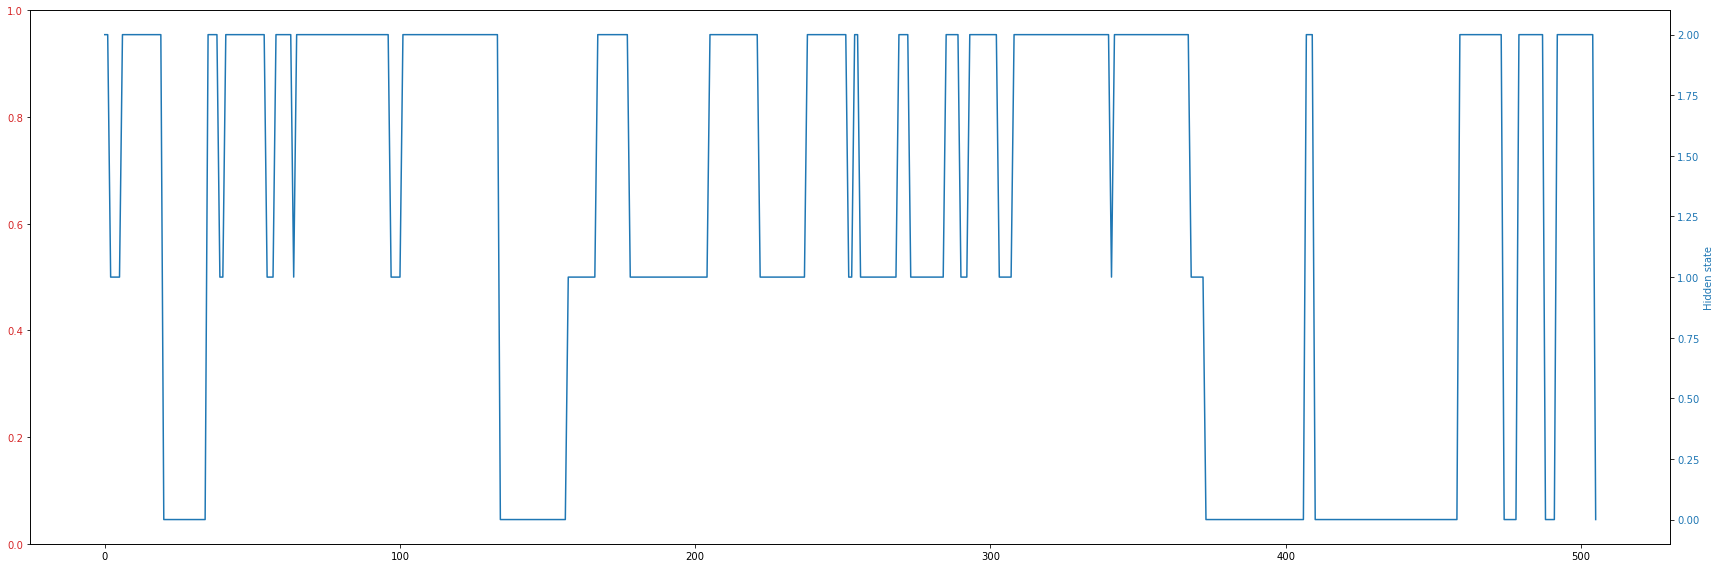

In [146]:
plot_states(y2, hidden_states, x_axis)

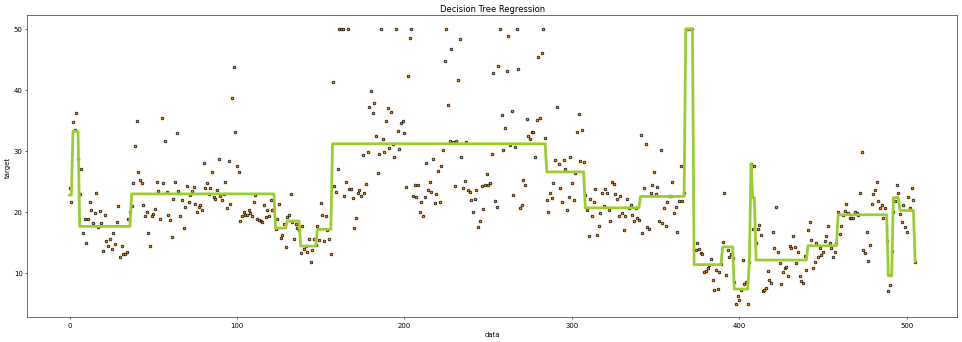

In [147]:
plt.figure(figsize=(24, 8), dpi=50)
plt.scatter(w, y, s=15, edgecolor="black", c="darkorange", label="data")
#plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=4)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=4)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.show()